<a href="https://colab.research.google.com/github/yesin25/PoC-Aeroman/blob/main/RNA_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)


TensorFlow 1.x selected.
1.15.2


Chekando Aeroman

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})

In [ ]:
#path_dataset=/content/drive/MyDrive/Prayaga/Proyectos 1.0/Aeroman/aeroman_limpio.xlsx

### 1.Importando dataset

In [ ]:
#df=pd.read_excel("".join(path_dataset,"data_limpia_aeroman.xlsx"))

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Prayaga/Proyectos 1.0/Aeroman/aeroman_limpio.xlsx")

In [ ]:
df.head()

,Hour of day,Qc Code,Qc Name,Employee Code,Employee Name,QC Log On Time,QC Log Off Time,Hangar,Aircraft,Taskcard Number,R / NR,TC Code,Request Type,Request Status,Wait Time,AVG Insp Time,Time_Insp_finalizado,Fecha,Time_Insp_finalizado_minutos,Time_espera_minutos,Time_Total_minutos
0,7,8604810,MARIO JOSE RODAS TORRES,8603819,FATIMA PATRICIA CHAVEZ VILLAGRAN,2020-05-02 07:37:32,2020-05-02 08:03:54,H1,N321R1,2020-91739,N,PRD,NC,CLOSED,00:43:48,00:26:22,00:26:22,2020-05-02 07:37:32,26.366667,43.800000,70.166667
1,7,8606312,ALEXIS ANTONIO PONCE PINEDA,8604812,LUIS ALBERTO PEREZ ROBLES,2020-05-02 07:41:44,2020-05-02 07:50:18,H6,N627E1,2020-171783,N,PRD,CR,CLOSED,00:01:08,00:08:34,00:08:34,2020-05-02 07:41:44,8.566667,1.133333,9.700000
2,7,8602999,JOSE ANTONIO CORTEZ RIVAS,8603309,ALVARO ANTONIO MATA JOAQUIN,2020-05-02 07:46:13,2020-05-02 08:01:12,H2|H3,N473S1,2020-142741,R,PRD,CR,CLOSED,00:02:14,00:14:59,00:14:59,2020-05-02 07:46:13,14.983333,2.233333,17.216667
3,7,8613808,ULISES ROBERTO LOPEZ PEREZ,8604814,ERICK FABRICIO LEON MEJIA,2020-05-02 07:51:45,2020-05-02 09:46:14,H5,N118I1,2020-111039,N,ADD,CR,CLOSED,00:01:19,01:54:29,01:54:29,2020-05-02 07:51:45,114.483333,1.316667,115.800000
4,7,8629612,SERGIO EDUARDO ASCENCIO ALFARO,8615015,JUAN DANIEL REYES DEL CID,2020-05-02 07:56:38,2020-05-02 08:17:49,H6,NaN,2020-171802,N,ADD,CR,CLOSED,00:04:04,00:21:11,00:21:11,2020-05-02 07:56:38,21.183333,4.066667,25.250000


In [ ]:
df['Qc Name'].value_counts()

FRANCISCO JAVIER SIBRIAN GUTIERREZ    2782
RICARDO MAURICIO PINEDA CORNEJO       2068
JESUS ORLANDO PEREZ HERNANDEZ         2043
NOE EDGARDO MARTINEZ MARTINEZ         1996
JUAN PABLO SERVELLON CORTEZ           1824
                                      ... 
MARIA JOSE MORAN ESCOBAR                 5
DENNIS EDGARDO LUNA MELARA               4
CARLOS GERSON CARRANZA MENA              2
IVAN ALEXANDER ERAZO DERAS               1
JOSE EFRAIN FUNES BELLOSO                1
Name: Qc Name, Length: 176, dtype: int64

In [ ]:
df['Qc Name'].unique()

array(['MARIO JOSE RODAS TORRES', 'ALEXIS ANTONIO PONCE PINEDA',
       'JOSE ANTONIO CORTEZ RIVAS', 'ULISES ROBERTO LOPEZ PEREZ',
       'SERGIO EDUARDO ASCENCIO ALFARO', 'JOSUE MILTON FLORES OSEGUEDA',
       'JOSE HUMBERTO MORENO GUERRERO', 'ADALBERTO VLADIMIR LEON',
       'DOUGLAS GUILLERMO LOPEZ MENDEZ',
       'JONATHAN ENRIQUE GARCIA CANALES', 'FRANKLIN OMAR MARTINEZ FLORES',
       'SALVADOR MORAN VARELA', 'ORLANDO ENRIQUE CONTRERAS SINTIGO',
       'JORGE ISAAC RAMIREZ GIL', 'FRANCISCO JAVIER SIBRIAN GUTIERREZ',
       'MANUEL DE JESUS LARA ALVARADO', 'ENRIQUE ERNESTO SOLIS VASQUEZ',
       'WILFRED VASQUEZ CORENA', 'SALVADOR OSMIN GOMEZ SANTOS',
       'ROBERTO MAURICIO QUINTANILLA PATIÑO', 'EDWIN ROBERTO FABIAN',
       'MARIO ERNESTO MILLA', 'MAURICIO EDGARDO GUARDADO MELGAR',
       'RAFAEL ALEJANDRO MURILLO ASCENCIO',
       'LUIS RICARDO MARTINEZ HERNANDEZ',
       'ROLANDO DE JESUS CARBALLO GUZMAN',
       'RICARDO SANTOS ALVARENGA RIVERA', 'MIGUEL EVENOR SISCO LOPEZ',

In [ ]:
df['Qc Name'].unique(),len(df['Qc Name'].unique()) # existen 176 trabajadores que son supervisores

(array(['MARIO JOSE RODAS TORRES', 'ALEXIS ANTONIO PONCE PINEDA',
        'JOSE ANTONIO CORTEZ RIVAS', 'ULISES ROBERTO LOPEZ PEREZ',
        'SERGIO EDUARDO ASCENCIO ALFARO', 'JOSUE MILTON FLORES OSEGUEDA',
        'JOSE HUMBERTO MORENO GUERRERO', 'ADALBERTO VLADIMIR LEON',
        'DOUGLAS GUILLERMO LOPEZ MENDEZ',
        'JONATHAN ENRIQUE GARCIA CANALES', 'FRANKLIN OMAR MARTINEZ FLORES',
        'SALVADOR MORAN VARELA', 'ORLANDO ENRIQUE CONTRERAS SINTIGO',
        'JORGE ISAAC RAMIREZ GIL', 'FRANCISCO JAVIER SIBRIAN GUTIERREZ',
        'MANUEL DE JESUS LARA ALVARADO', 'ENRIQUE ERNESTO SOLIS VASQUEZ',
        'WILFRED VASQUEZ CORENA', 'SALVADOR OSMIN GOMEZ SANTOS',
        'ROBERTO MAURICIO QUINTANILLA PATIÑO', 'EDWIN ROBERTO FABIAN',
        'MARIO ERNESTO MILLA', 'MAURICIO EDGARDO GUARDADO MELGAR',
        'RAFAEL ALEJANDRO MURILLO ASCENCIO',
        'LUIS RICARDO MARTINEZ HERNANDEZ',
        'ROLANDO DE JESUS CARBALLO GUZMAN',
        'RICARDO SANTOS ALVARENGA RIVERA', 'MIGUEL EVEN

In [ ]:
df.columns

Index(['Hour of day', 'Qc Code', 'Qc Name', 'Employee Code', 'Employee Name',
       'QC Log On Time', 'QC Log Off Time', 'Hangar', 'Aircraft',
       'Taskcard Number', 'R / NR', 'TC Code', 'Request Type',
       'Request Status', 'Wait Time', 'AVG Insp Time', 'Time_Insp_finalizado',
       'Fecha', 'Time_Insp_finalizado_minutos', 'Time_espera_minutos',
       'Time_Total_minutos'],
      dtype='object')

In [ ]:
df1 = df.rename(columns={'Hour of day': 'Hour_of_day',
        'Qc Code':'Qc_Code',
        'Employee Code':'Employee_Code',
        'Employee Name':'Employee_Name',
        'QC Log On Time':'QC_Log_On_Time',
        'QC Log Off Time':'QC_Log_Off_Time',
       'Taskcard Number':'Taskcard_Number',
        'R / NR':'R/NR',
       'TC Code':'TC_Code',
       'Request Type':'Request_Type',
       'Request Status':'Request_Status',
        'Wait Time':'Wait_Time',
        'AVG Insp Time':'AVG_Insp_Time'})

In [ ]:
df1.columns

Index(['Hour_of_day', 'Qc_Code', 'Qc Name', 'Employee_Code', 'Employee_Name',
       'QC_Log_On_Time', 'QC_Log_Off_Time', 'Hangar', 'Aircraft',
       'Taskcard_Number', 'R/NR', 'TC_Code', 'Request_Type', 'Request_Status',
       'Wait_Time', 'AVG_Insp_Time', 'Time_Insp_finalizado', 'Fecha',
       'Time_Insp_finalizado_minutos', 'Time_espera_minutos',
       'Time_Total_minutos'],
      dtype='object')

In [ ]:
df.dtypes

Hour of day                              int64
Qc Code                                 object
Qc Name                                 object
Employee Code                           object
Employee Name                           object
QC Log On Time                  datetime64[ns]
QC Log Off Time                 datetime64[ns]
Hangar                                  object
Aircraft                                object
Taskcard Number                         object
R / NR                                  object
TC Code                                 object
Request Type                            object
Request Status                          object
Wait Time                               object
AVG Insp Time                           object
Time_Insp_finalizado                    object
Fecha                           datetime64[ns]
Time_Insp_finalizado_minutos           float64
Time_espera_minutos                    float64
Time_Total_minutos                     float64
dtype: object

In [ ]:
df['Employee Name'].value_counts()

ANDREA IVETTE LOPEZ GUARDADO                968
KEVIN ALFREDO FIGUEROA RIVERA               827
FATIMA GABRIELA MEJIA PEREZ                 816
DOLORES XENIA YAMILETH PARADA DE ESCOBAR    793
LORENA LISSETH LOPEZ DE CARDENAS            724
                                           ... 
ELMER OMAR CORTEZ MELENDEZ                    1
BRYAN IVAN GARCIA MONTES                      1
CARLOS EDUARDO MONTALVO AGUILA                1
HERIBERTO HERNANDEZ BURGOS                    1
CRISTIAN ALEXANDER CARRERA GONZALEZ           1
Name: Employee Name, Length: 2383, dtype: int64

In [ ]:
df['Employee Name'].nunique() #existe 2383 mecanicos supervisados por 176 controladores de calidad

2383

In [ ]:
df1.Fecha=pd.to_datetime(df1.Fecha)

In [ ]:
2383/176 #aprox 14 mecanicos por un supervisor

In [ ]:
df1.head(3)

,Hour_of_day,Qc_Code,Qc Name,Employee_Code,Employee_Name,QC_Log_On_Time,QC_Log_Off_Time,Hangar,Aircraft,Taskcard_Number,R/NR,TC_Code,Request_Type,Request_Status,Wait_Time,AVG_Insp_Time,Time_Insp_finalizado,Fecha,Time_Insp_finalizado_minutos,Time_espera_minutos,Time_Total_minutos
0,7,8604810,MARIO JOSE RODAS TORRES,8603819,FATIMA PATRICIA CHAVEZ VILLAGRAN,2020-05-02 07:37:32,2020-05-02 08:03:54,H1,N321R1,2020-91739,N,PRD,NC,CLOSED,00:43:48,00:26:22,00:26:22,2020-05-02 07:37:32,26.366667,43.800000,70.166667
1,7,8606312,ALEXIS ANTONIO PONCE PINEDA,8604812,LUIS ALBERTO PEREZ ROBLES,2020-05-02 07:41:44,2020-05-02 07:50:18,H6,N627E1,2020-171783,N,PRD,CR,CLOSED,00:01:08,00:08:34,00:08:34,2020-05-02 07:41:44,8.566667,1.133333,9.700000
2,7,8602999,JOSE ANTONIO CORTEZ RIVAS,8603309,ALVARO ANTONIO MATA JOAQUIN,2020-05-02 07:46:13,2020-05-02 08:01:12,H2|H3,N473S1,2020-142741,R,PRD,CR,CLOSED,00:02:14,00:14:59,00:14:59,2020-05-02 07:46:13,14.983333,2.233333,17.216667


In [ ]:
from datetime import datetime

In [ ]:
#Añadiendo año
df1['Year'] = df1['Fecha'].dt.year
#Añadiendo Mes
df1['Month'] = df1['Fecha'].dt.month
#añadiendo day
df1['Day'] = df1['Fecha'].dt.day

# eliminando columnas de prueba
#df1.drop(['year', 'dateInt'], axis=1)

In [ ]:
#concatenamos la variable fecha para formar nuestra serie de tiempo #yelsin
df1['fecha']=df1.Year.astype(str) + str('-') + df1.Month.astype(str) + str('-') + df1.Day.astype(str)

In [ ]:
df1.fecha=pd.to_datetime(df1.fecha)

In [ ]:
df1.dtypes

Hour_of_day                              int64
Qc_Code                                 object
Qc Name                                 object
Employee_Code                           object
Employee_Name                           object
QC_Log_On_Time                  datetime64[ns]
QC_Log_Off_Time                 datetime64[ns]
Hangar                                  object
Aircraft                                object
Taskcard_Number                         object
R/NR                                    object
TC_Code                                 object
Request_Type                            object
Request_Status                          object
Wait_Time                               object
AVG_Insp_Time                           object
Time_Insp_finalizado                    object
Fecha                           datetime64[ns]
Time_Insp_finalizado_minutos           float64
Time_espera_minutos                    float64
Time_Total_minutos                     float64
Year         

In [ ]:
df1.head(3)

,Hour_of_day,Qc_Code,Qc Name,Employee_Code,Employee_Name,QC_Log_On_Time,QC_Log_Off_Time,Hangar,Aircraft,Taskcard_Number,R/NR,TC_Code,Request_Type,Request_Status,Wait_Time,AVG_Insp_Time,Time_Insp_finalizado,Fecha,Time_Insp_finalizado_minutos,Time_espera_minutos,Time_Total_minutos,Year,Month,Day,fecha
0,7,8604810,MARIO JOSE RODAS TORRES,8603819,FATIMA PATRICIA CHAVEZ VILLAGRAN,2020-05-02 07:37:32,2020-05-02 08:03:54,H1,N321R1,2020-91739,N,PRD,NC,CLOSED,00:43:48,00:26:22,00:26:22,2020-05-02 07:37:32,26.366667,43.800000,70.166667,2020,5,2,2020-05-02
1,7,8606312,ALEXIS ANTONIO PONCE PINEDA,8604812,LUIS ALBERTO PEREZ ROBLES,2020-05-02 07:41:44,2020-05-02 07:50:18,H6,N627E1,2020-171783,N,PRD,CR,CLOSED,00:01:08,00:08:34,00:08:34,2020-05-02 07:41:44,8.566667,1.133333,9.700000,2020,5,2,2020-05-02
2,7,8602999,JOSE ANTONIO CORTEZ RIVAS,8603309,ALVARO ANTONIO MATA JOAQUIN,2020-05-02 07:46:13,2020-05-02 08:01:12,H2|H3,N473S1,2020-142741,R,PRD,CR,CLOSED,00:02:14,00:14:59,00:14:59,2020-05-02 07:46:13,14.983333,2.233333,17.216667,2020,5,2,2020-05-02


In [ ]:
df1.dtypes

Hour_of_day                              int64
Qc_Code                                 object
Qc Name                                 object
Employee_Code                           object
Employee_Name                           object
QC_Log_On_Time                  datetime64[ns]
QC_Log_Off_Time                 datetime64[ns]
Hangar                                  object
Aircraft                                object
Taskcard_Number                         object
R/NR                                    object
TC_Code                                 object
Request_Type                            object
Request_Status                          object
Wait_Time                               object
AVG_Insp_Time                           object
Time_Insp_finalizado                    object
Fecha                           datetime64[ns]
Time_Insp_finalizado_minutos           float64
Time_espera_minutos                    float64
Time_Total_minutos                     float64
Year         

In [ ]:
df.columns

Index(['Hour of day', 'Qc Code', 'Qc Name', 'Employee Code', 'Employee Name',
       'QC Log On Time', 'QC Log Off Time', 'Hangar', 'Aircraft',
       'Taskcard Number', 'R / NR', 'TC Code', 'Request Type',
       'Request Status', 'Wait Time', 'AVG Insp Time', 'Time_Insp_finalizado',
       'Fecha', 'Time_Insp_finalizado_minutos', 'Time_espera_minutos',
       'Time_Total_minutos'],
      dtype='object')

In [ ]:
df.head(2)

,Hour of day,Qc Code,Qc Name,Employee Code,Employee Name,QC Log On Time,QC Log Off Time,Hangar,Aircraft,Taskcard Number,R / NR,TC Code,Request Type,Request Status,Wait Time,AVG Insp Time,Time_Insp_finalizado,Fecha,Time_Insp_finalizado_minutos,Time_espera_minutos,Time_Total_minutos
0,7,8604810,MARIO JOSE RODAS TORRES,8603819,FATIMA PATRICIA CHAVEZ VILLAGRAN,2020-05-02 07:37:32,2020-05-02 08:03:54,H1,N321R1,2020-91739,N,PRD,NC,CLOSED,00:43:48,00:26:22,00:26:22,2020-05-02 07:37:32,26.366667,43.800000,70.166667
1,7,8606312,ALEXIS ANTONIO PONCE PINEDA,8604812,LUIS ALBERTO PEREZ ROBLES,2020-05-02 07:41:44,2020-05-02 07:50:18,H6,N627E1,2020-171783,N,PRD,CR,CLOSED,00:01:08,00:08:34,00:08:34,2020-05-02 07:41:44,8.566667,1.133333,9.700000


In [ ]:
df2=df1[['fecha','Time_Insp_finalizado_minutos','Year','Month','Day']]

In [ ]:
df2.dtypes

fecha                           datetime64[ns]
Time_Insp_finalizado_minutos           float64
Year                                     int64
Month                                    int64
Day                                      int64
dtype: object

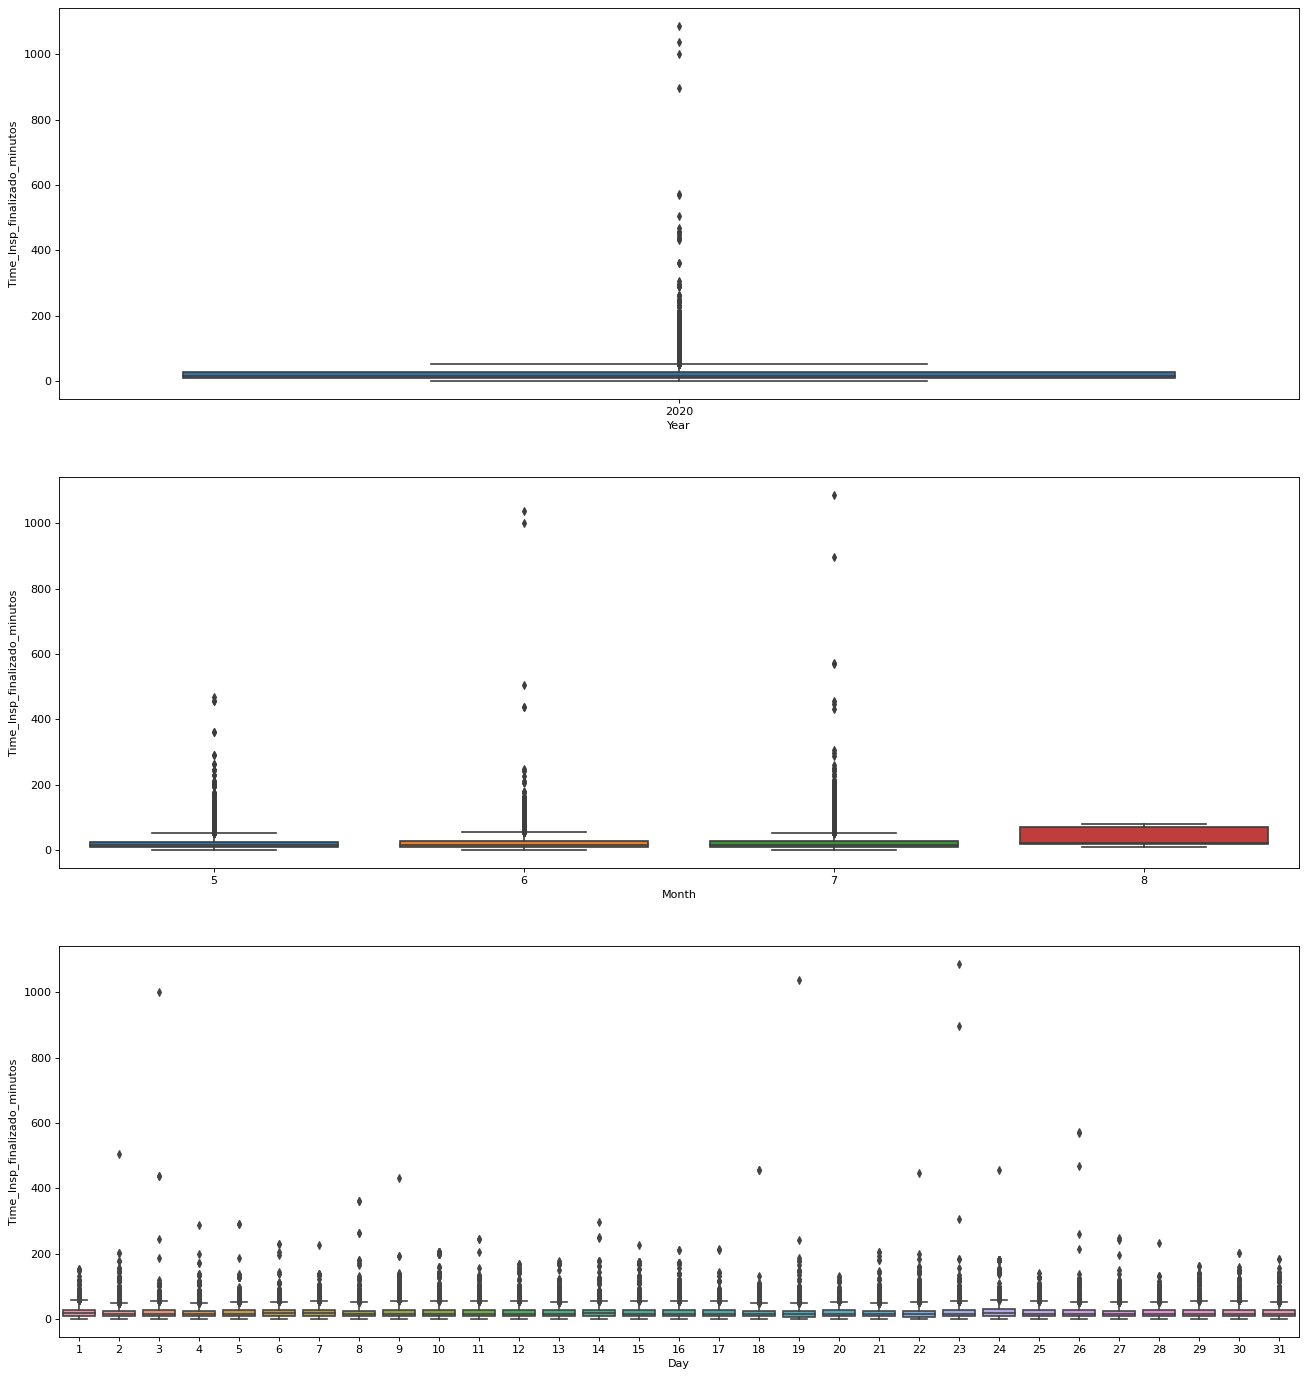

In [ ]:
fig, axes=plt.subplots(3,1,figsize=(20,22),dpi=80)
sns.boxplot(x='Year',y= 'Time_Insp_finalizado_minutos',data=df2,ax=axes[0])
sns.boxplot(x='Month',y= 'Time_Insp_finalizado_minutos',data=df2,ax=axes[1])
sns.boxplot(x='Day',y= 'Time_Insp_finalizado_minutos',data=df2,ax=axes[2])

In [ ]:
df2=df1[['fecha','Time_Insp_finalizado_minutos']]

In [ ]:
df2=df2.groupby(['fecha']).sum() #agrupamos las ventas totales por dia

In [ ]:
df2.head(3)

,Time_Insp_finalizado_minutos
fecha,
2020-05-02,13616.216667
2020-05-03,16623.683330
2020-05-04,14124.950001


In [ ]:
#eliminamos un registro atipico,la ultima fila
df2 = df2[:-1]
#otra forma df2.drop([1, 2],axis=0)

In [ ]:
df2

,Time_Insp_finalizado_minutos
fecha,
2020-05-02,13616.216667
2020-05-03,16623.683330
2020-05-04,14124.950001
2020-05-05,18123.466665
2020-05-06,17143.933333
...,...
2020-07-27,22284.949999
2020-07-28,29122.549999
2020-07-29,32512.849998


In [ ]:
df2.shape

(91, 1)

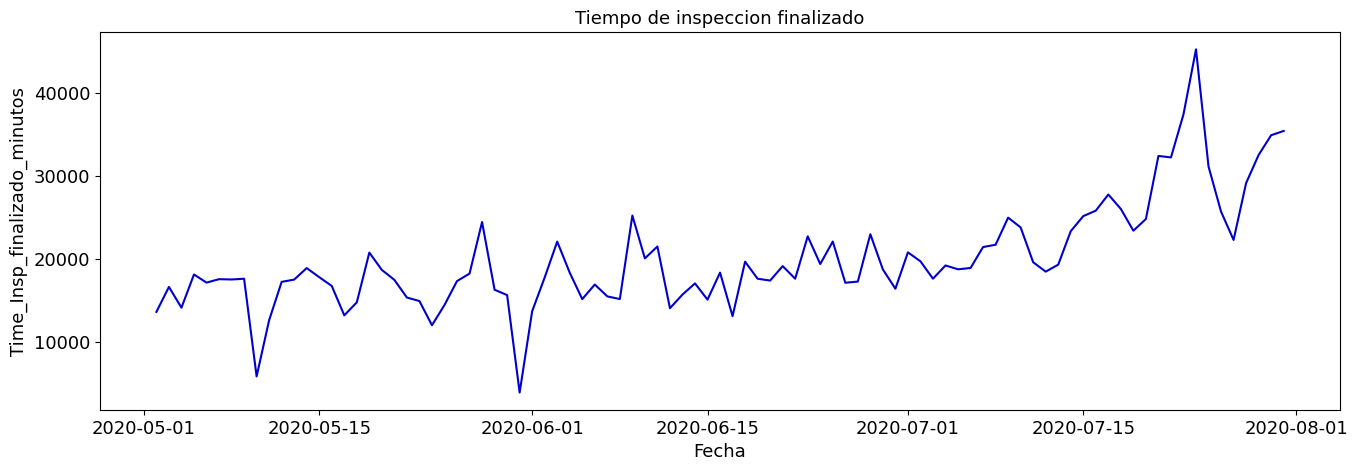

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.title('Tiempo de inspeccion finalizado', fontsize=13)
plt.plot(df2.index, df2.Time_Insp_finalizado_minutos,color='mediumblue')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Fecha',fontsize=13)
plt.ylabel('Time_Insp_finalizado_minutos',fontsize=13)
plt.show()

In [ ]:
df2

,Time_Insp_finalizado_minutos
fecha,
2020-05-02,13616.216667
2020-05-03,16623.683330
2020-05-04,14124.950001
2020-05-05,18123.466665
2020-05-06,17143.933333
...,...
2020-07-27,22284.949999
2020-07-28,29122.549999
2020-07-29,32512.849998


In [ ]:
18/91

0.1978021978021978

In [ ]:
len(df2[-17:])

17

In [ ]:
train, test= df2[:-17], df2[-17:]

## **3.-Feature Scaling**

In [ ]:
#Escalado de caracteristicas (features)
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
train=Scaler.transform(train)
test=Scaler.transform(test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')


from google.colab import files
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
# se va pronosticar 17 puntos hacia adelante (1punto=1dia de venta)
#Se necesita una ventana de 17 dias
n_input= 17
n_features=1
generator=TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [ ]:
generator.data.shape

(74, 1)

In [ ]:
n_features

1

## **.-Training LSTM**

In [ ]:
model=Sequential()
model.add(LSTM(200, activation="relu", input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(loss="mse", optimizer='adam')
model.fit_generator(generator, epochs=180)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/180
10/10 [==============================] - 1s 96ms/step - loss: 0.3793
Epoch 2/180
10/10 [==============================] - 0s 31ms/step - loss: 0.0934
Epoch 3/180
10/10 [==============================] - 0s 32ms/step - loss: 0.0477
Epoch 4/180
10/10 [==============================] - 0s 30ms/step - loss: 0.0332
Epoch 5/180
10/10 [==============================] - 0s 30ms/step - loss: 0.0298
Epoch 6/180
10/10 [==============================] - 0s 31ms/step - loss: 0.0269
Epoch 7/180
10/10 [==============================] - 0s 30ms/step - loss: 0.0318
Epoch 8/180
10/10 [==============================] - 0s 32ms/step - loss: 0.0307
Epoch 9/180
10/10 [==============================] - 0s 31ms/step - loss: 0.0272
Epoch 10/180
10/10 [==============================] - 0s 31ms/step - loss: 0.0295
Epoch 11/180
10/10 [==============================] - 0s 30ms/step - loss: 0.0292
Epoch 12/180
10/10 [=====

In [ ]:
#Una vez que se entrena el modelo, podemos generar una predicción para fechas futuras.
#La idea aquí: generar una predicción para un paso futuro, utilizando los últimos 17 pasos.
# Agregue una nueva predicción a la matriz, elimine la primera entrada de la misma matriz y
#prediga el siguiente paso con una matriz actualizada de 17 pasos.

In [ ]:
history=model.fit_generator(generator, epochs=180)

Epoch 1/180
10/10 [==============================] - 0s 34ms/step - loss: 0.0193
Epoch 2/180
10/10 [==============================] - 0s 34ms/step - loss: 0.0175
Epoch 3/180
10/10 [==============================] - 0s 34ms/step - loss: 0.0175
Epoch 4/180
10/10 [==============================] - 0s 32ms/step - loss: 0.0171
Epoch 5/180
10/10 [==============================] - 0s 32ms/step - loss: 0.0174
Epoch 6/180
10/10 [==============================] - 0s 31ms/step - loss: 0.0202
Epoch 7/180
10/10 [==============================] - 0s 32ms/step - loss: 0.0157
Epoch 8/180
10/10 [==============================] - 0s 29ms/step - loss: 0.0174
Epoch 9/180
10/10 [==============================] - 0s 31ms/step - loss: 0.0216
Epoch 10/180
10/10 [==============================] - 0s 29ms/step - loss: 0.0192
Epoch 11/180
10/10 [==============================] - 0s 30ms/step - loss: 0.0180
Epoch 12/180
10/10 [==============================] - 0s 33ms/step - loss: 0.0180
Epoch 13/180
10/10 [=====

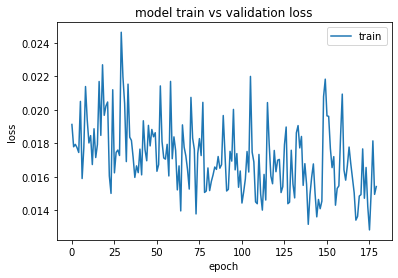

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
pred_list=[]

batch = train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [ ]:
df_predict=pd.DataFrame(Scaler.inverse_transform(pred_list),index=df2[-n_input:].index, columns=['Predictions'])

In [ ]:
df_test= pd.concat([df2, df_predict],axis=1)

In [ ]:
df_test.tail(18)

,Time_Insp_finalizado_minutos,Predictions
fecha,,
2020-07-14,23338.800001,NaN
2020-07-15,25149.583334,21896.969468
2020-07-16,25805.666668,20794.316205
2020-07-17,27749.416669,21030.314116
2020-07-18,26013.499998,20426.619445
2020-07-19,23395.100004,21222.456876
2020-07-20,24804.199998,22551.932020
2020-07-21,32394.616667,23627.985846
2020-07-22,32218.033335,24872.240651


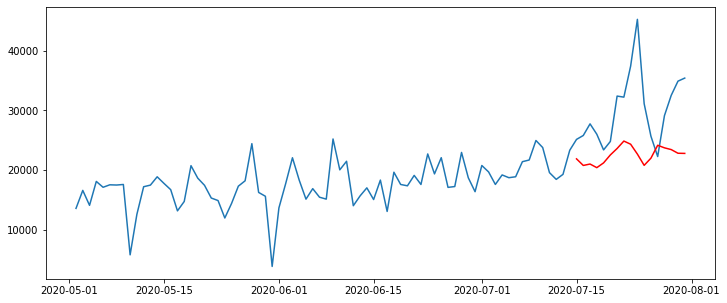

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_test.index, df_test['Time_Insp_finalizado_minutos'])
plt.plot (df_test.index, df_test['Predictions'],color='r')
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_test['Time_Insp_finalizado_minutos'][-17:],df_test['Predictions'][-17:])
rmse=math.sqrt(mse)
print("rmse",rmse)

rmse 9296.336256438739


In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_test['Time_Insp_finalizado_minutos'][-17:],df_test['Predictions'][-17:])
rmse=math.sqrt(mse)
print("rmse",rmse)

rmse 9296.336256438739


In [ ]:
pred_list

[array([0.8440959], dtype=float32),
 array([0.7923612], dtype=float32),
 array([0.80343384], dtype=float32),
 array([0.77510947], dtype=float32),
 array([0.81244886], dtype=float32),
 array([0.87482566], dtype=float32),
 array([0.92531234], dtype=float32),
 array([0.98369074], dtype=float32),
 array([0.9590055], dtype=float32),
 array([0.8814995], dtype=float32),
 array([0.7931242], dtype=float32),
 array([0.849435], dtype=float32),
 array([0.9506706], dtype=float32),
 array([0.9306611], dtype=float32),
 array([0.91691405], dtype=float32),
 array([0.88809854], dtype=float32),
 array([0.88690597], dtype=float32)]

In [ ]:
train= df2
Scaler.fit(train)
train=Scaler.transform(train)

n_input = 17
n_features = 1
generator = TimeseriesGenerator(train, train, length= n_input, batch_size=6)

model.fit_generator(generator,epochs=100)

pred_list=[]

batch = train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
  pred_list.append(model.predict(batch)[0])
  batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

    #fiting model with given training dataset
    #history_data=model.fit(xtrain, ytrain, batch_size=50, epochs=200, verbose=2, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 57ms/step - loss: 0.0161
Epoch 2/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0094
Epoch 3/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0111
Epoch 4/100
13/13 [==============================] - 0s 28ms/step - loss: 0.0089
Epoch 5/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0077
Epoch 6/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0077
Epoch 7/100
13/13 [==============================] - 0s 28ms/step - loss: 0.0074
Epoch 8/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0079
Epoch 9/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0080
Epoch 10/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0085
Epoch 11/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0076
Epoch 12/100
13/13 [==============================] - 0s 32ms/step - loss: 0.0072
Epoch 13/100
13/13 [=====

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
df2.tail()

,Time_Insp_finalizado_minutos
fecha,
2020-07-27,22284.949999
2020-07-28,29122.549999
2020-07-29,32512.849998
2020-07-30,34889.449998
2020-07-31,35403.966666


In [ ]:
[df2.index[-1] + DateOffset(days=x) for x in range(0,18)]

[Timestamp('2020-07-31 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2020-08-03 00:00:00'),
 Timestamp('2020-08-04 00:00:00'),
 Timestamp('2020-08-05 00:00:00'),
 Timestamp('2020-08-06 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-08 00:00:00'),
 Timestamp('2020-08-09 00:00:00'),
 Timestamp('2020-08-10 00:00:00'),
 Timestamp('2020-08-11 00:00:00'),
 Timestamp('2020-08-12 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-14 00:00:00'),
 Timestamp('2020-08-15 00:00:00'),
 Timestamp('2020-08-16 00:00:00'),
 Timestamp('2020-08-17 00:00:00')]

In [ ]:
from pandas.tseries.offsets import DateOffset
add_dates=[df2.index[-1] + DateOffset(days=x) for x in range(0,18)] #ventas.index[-1] + DateOffset(days=x) for x in range(0,61)]
future_dates = pd.DataFrame(index = add_dates[1:], columns= df2.columns) #pronosticaremos

In [ ]:
df2_predict=pd.DataFrame(Scaler.inverse_transform(pred_list),index=future_dates[-n_input:].index, columns=['Prediction'])
df2_predict

,Prediction
2020-08-01,36309.455121
2020-08-02,35192.203619
2020-08-03,34809.901747
2020-08-04,37904.832086
2020-08-05,40807.644855
2020-08-06,42887.003729
2020-08-07,43229.059151
2020-08-08,41100.188917
2020-08-09,37449.859045
2020-08-10,30974.904160


In [ ]:
df_proj = pd.concat([df2,df2_predict], axis=1)
df_proj.tail(18)

,Time_Insp_finalizado_minutos,Prediction
2020-07-31,35403.966666,NaN
2020-08-01,NaN,36309.455121
2020-08-02,NaN,35192.203619
2020-08-03,NaN,34809.901747
2020-08-04,NaN,37904.832086
2020-08-05,NaN,40807.644855
2020-08-06,NaN,42887.003729
2020-08-07,NaN,43229.059151
2020-08-08,NaN,41100.188917
2020-08-09,NaN,37449.859045


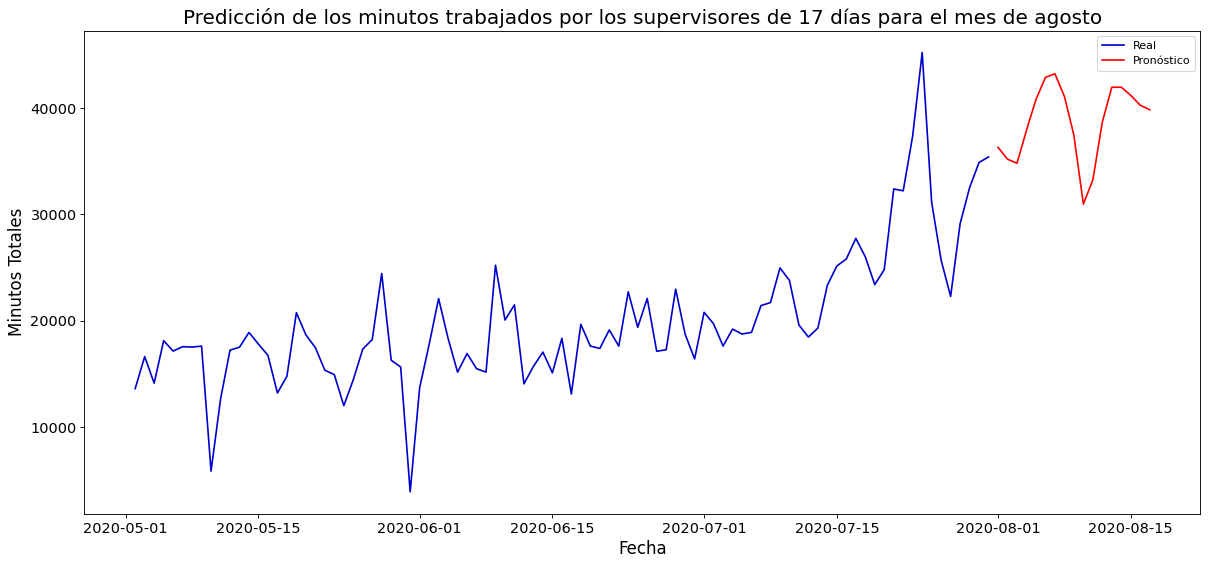

In [ ]:
plt.figure(figsize=(18,8), dpi=80)
plt.plot(df_proj.index, df_proj['Time_Insp_finalizado_minutos'],color= 'mediumblue',label='Real')
plt.plot(df_proj.index, df_proj['Prediction'],color= 'r',label='Pronóstico')
plt.title('Predicción de los minutos trabajados por los supervisores de 17 días para el mes de agosto', fontsize=18)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Fecha',fontsize=15)
plt.ylabel('Minutos Totales',fontsize=15)
plt.legend()
plt.show();

No handles with labels found to put in legend.


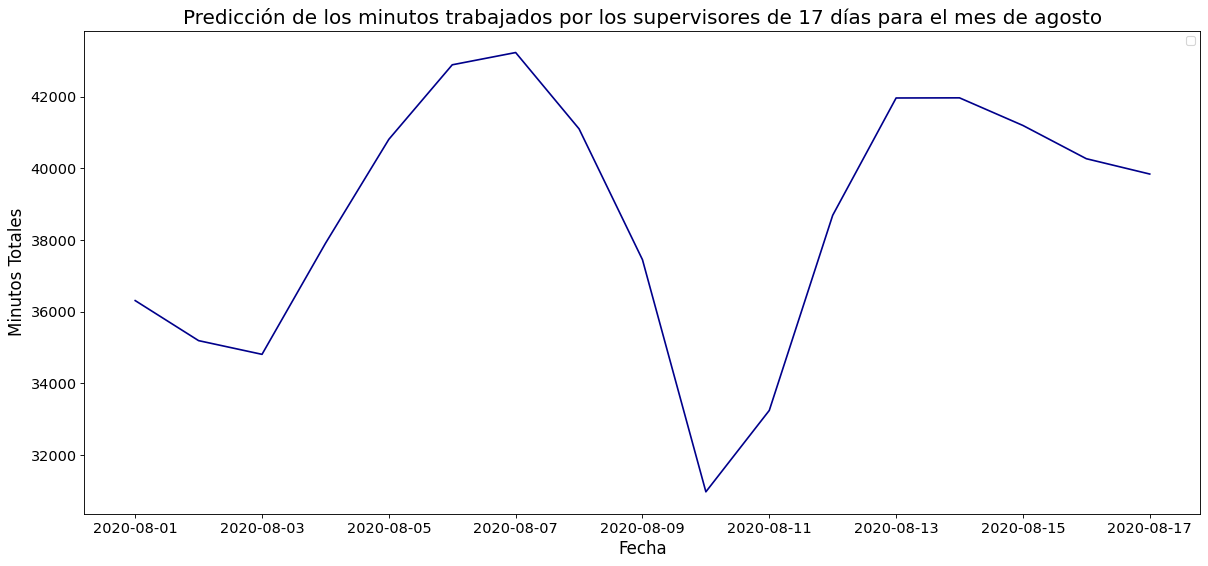

In [ ]:
plt.figure(figsize=(18,8), dpi=80)
plt.plot(df_proj.index, df_proj['Prediction'],color= 'darkblue')

plt.title('Predicción de los minutos trabajados por los supervisores de 17 días para el mes de agosto', fontsize=18)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('Fecha',fontsize=15)
plt.ylabel('Minutos Totales',fontsize=15)
plt.legend()
plt.show();